In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import SaveModelCallback
import matplotlib.pyplot as plt

In [0]:
bs=32

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
np.random.seed(2)

In [0]:
def get_data(sz):
  data=ImageDataBunch.from_folder('/content/drive/My Drive/Wet_Dry_Classifier_Dataset',train='.',valid_pct=0.2,ds_tfms=get_transforms(),size=sz,bs=bs).normalize(imagenet_stats)
  return data

In [8]:
learner_64= cnn_learner(get_data(64), models.vgg16_bn, metrics=accuracy).to_fp16().mixup()

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:16<00:00, 33.8MB/s]


In [9]:
learner_64.fit_one_cycle(9,callbacks=[SaveModelCallback(learner_64,monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,1.008508,0.482523,0.816456,08:19
1,0.880393,0.804438,0.768987,01:18
2,0.797491,0.928322,0.813291,01:17
3,0.716557,0.398328,0.816456,01:15
4,0.622465,0.438994,0.848101,01:17
5,0.565783,0.401504,0.886076,01:18
6,0.528577,0.490310,0.892405,01:19
7,0.514250,0.515546,0.886076,01:19
8,0.499514,0.700521,0.892405,01:19


Better model found at epoch 0 with accuracy value: 0.8164557218551636.
Better model found at epoch 4 with accuracy value: 0.8481012582778931.
Better model found at epoch 5 with accuracy value: 0.8860759735107422.
Better model found at epoch 6 with accuracy value: 0.892405092716217.


In [0]:
learner_128= cnn_learner(get_data(128), models.vgg16_bn, metrics=accuracy).to_fp16().mixup()

In [11]:
learner_128.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (1265 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
dry,dry,dry,dry,dry
Path: /content/drive/My Drive/Wet_Dry_Classifier_Dataset;

Valid: LabelList (316 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
dry,wet,wet,wet,dry
Path: /content/drive/My Drive/Wet_Dry_Classifier_Dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_si

In [12]:
learner_128.fit_one_cycle(9,callbacks=[SaveModelCallback(learner_128,monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,0.469402,0.260384,0.914557,01:28
1,0.464847,0.239903,0.914557,01:29
2,0.477896,0.251465,0.911392,01:29
3,0.460506,0.246632,0.898734,01:29
4,0.454032,0.241825,0.908228,01:30
5,0.445550,0.236592,0.889241,01:29
6,0.412016,0.227821,0.911392,01:29
7,0.404637,0.223390,0.917722,01:31
8,0.388544,0.219803,0.914557,01:28


Better model found at epoch 0 with accuracy value: 0.9145569801330566.
Better model found at epoch 7 with accuracy value: 0.9177215099334717.


In [0]:
learner_224= cnn_learner(get_data(224), models.vgg16_bn, metrics=accuracy).to_fp16().mixup()

In [14]:
learner_224.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (1265 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dry,dry,dry,dry,dry
Path: /content/drive/My Drive/Wet_Dry_Classifier_Dataset;

Valid: LabelList (316 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
wet,wet,dry,dry,dry
Path: /content/drive/My Drive/Wet_Dry_Classifier_Dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_si

In [15]:
learner_224.fit_one_cycle(9,callbacks=[SaveModelCallback(learner_224,monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,0.371914,0.168497,0.943038,01:45
1,0.388900,0.182430,0.936709,01:43
2,0.407636,0.198013,0.933544,01:42
3,0.404760,0.177047,0.933544,01:43
4,0.393226,0.174760,0.936709,01:42
5,0.377328,0.151429,0.949367,01:43
6,0.368236,0.163747,0.962025,01:40
7,0.360764,0.158791,0.955696,01:42
8,0.355662,0.158119,0.955696,01:41


Better model found at epoch 0 with accuracy value: 0.9430379867553711.
Better model found at epoch 5 with accuracy value: 0.949367105960846.
Better model found at epoch 6 with accuracy value: 0.9620253443717957.


In [0]:
learner_256= cnn_learner(get_data(256), models.vgg16_bn, metrics=accuracy).to_fp16().mixup()

In [17]:
learner_256.load('bestmodel')

Learner(data=ImageDataBunch;

Train: LabelList (1265 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
dry,dry,dry,dry,dry
Path: /content/drive/My Drive/Wet_Dry_Classifier_Dataset;

Valid: LabelList (316 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
dry,wet,wet,wet,wet
Path: /content/drive/My Drive/Wet_Dry_Classifier_Dataset;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_si

In [18]:
learner_256.fit_one_cycle(9,callbacks=[SaveModelCallback(learner_256,monitor='accuracy')])

epoch,train_loss,valid_loss,accuracy,time
0,0.365859,0.121784,0.971519,01:51
1,0.360078,0.145494,0.949367,01:49
2,0.366673,0.157656,0.924051,01:49
3,0.379100,0.183399,0.952532,01:47
4,0.375675,0.142552,0.949367,01:49
5,0.364538,0.115889,0.946203,01:50
6,0.346040,0.138725,0.943038,01:49
7,0.339821,0.132061,0.936709,01:48
8,0.347153,0.129777,0.939873,01:49


Better model found at epoch 0 with accuracy value: 0.9715189933776855.


In [19]:
interp = ClassificationInterpretation.from_learner(learner_256)

losses,idxs = interp.top_losses()

len(get_data(256).valid_ds)==len(losses)==len(idxs)

True

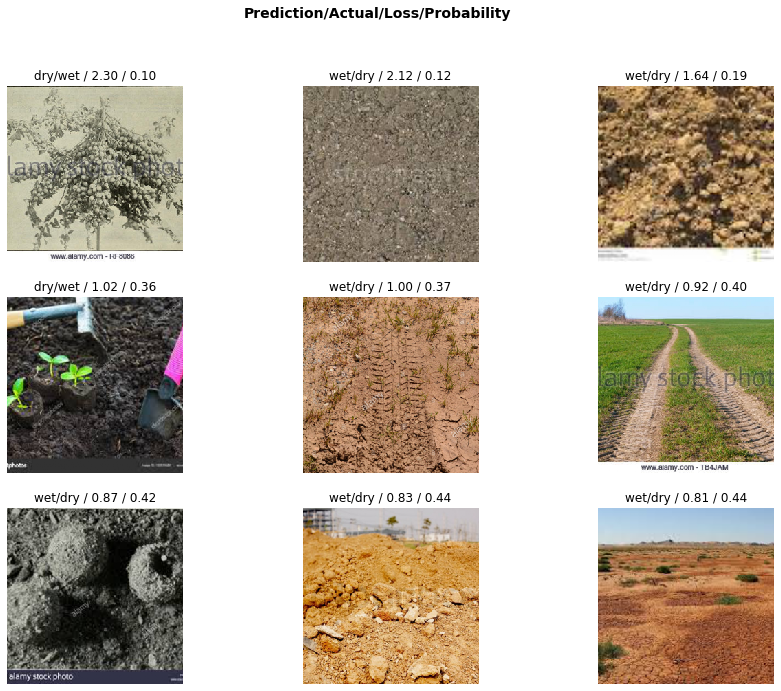

In [20]:
interp.plot_top_losses(9, figsize=(15,11))

In [21]:
doc(interp.plot_top_losses)

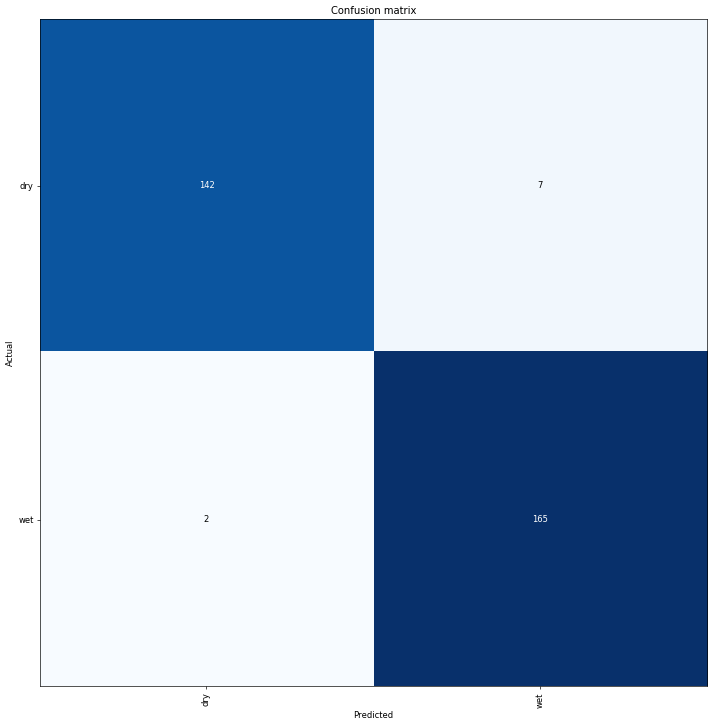

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)